# Introduction
Microsoft has identified a new business oportunity in the film industry following the success of other major companies producing original films. We will explore high performing film genres and translate them into actionable insights.

## Objectives
- **Analyze Current Box Office trends:** Examine the type of films that are currently succesful at the box office.
- **Identify Key Film Attributes:** Determine the attributes (e.g., genre, target audience, budget range) of the top-performing films
- **Provide Actionable Insights:** Offer recommendations on the type of films Microsoft should produce in the analysis.

## Key Questions
1. **What genres are currently performing the best at the box office?**
2. **What re the common characteristics of the top-grossing films (e.g., budget, cast, director, special effects)?**
3. **Who are the target audiences for these successful films?**
4. **How do seasonal trends affect box office performance?**
5. **What marketing strategies are being used by top-performing films?**

### 1. Data Undestanding
In this part, we will: 
1. **preprocess dataset from Box Office Mojo (Data\bom.movie_gross.csv) which contains data on movies doing well at the box office in terms of domestic earnings and foreign earnings.**
2. **process data from review.tsv which contains a review of the movies in the box office.**
3. **review the budgets spent to produce movies that are doing well at the box office.**

In [41]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1.1) Read `bom.movie_gross.csv` into a pandas DataFrame named `df`

We will use pandas to create a new DataFrame, called `df`, containing the data from the dataset in the file `bom.movie_gross.csv` in the folder containing this notebook. 

In [42]:
df = pd.read_csv('Data/bom.movie_gross.csv')
df.head() # Returns the first five rows from the datafame.

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [73]:
df['year'].value_counts()

2015    450
2016    436
2012    399
2011    398
2014    394
2013    350
2010    327
2017    320
2018    308
Name: year, dtype: int64

In [43]:
df.shape # Returns a tuple representing the rows and columns of the  dataframe.

(3387, 5)

In [44]:
#To check a  summary of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### 1.2) Read `Data\tn.movie_budgets.csv` into a pandas DataFrame named `budgets`

We will use pandas to create a new DataFrame, called `budgets`, containing the data from the dataset in the file `Data\tn.movie_budgets.csv` in the folder containing this notebook. 

In [45]:
budgets = pd.read_csv('Data/tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [46]:
budgets.shape

(5782, 6)

In [47]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### From the above code block, we can observe that there are missing values as the number of Non-Null Counts are different. We will handle this in part 2 on Data Preparation.

# Part 2: Data Preparation
In this part, we will clean and transform the data. This includes handling missing values, converting data types, filtering and more.

## 2.1: Data Preparation - Data\bom.movie_gross.csv**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [49]:
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

##### From the above code block, we can see that the studio column has 5 missing values, domestic gross has 28 missing values & foreign gross has 1350 missing values. Now that we know the missing values in each column, we can make decisions on how to deal with them.

##### In the cell below;
- **Let's determine what percentage of rows in columns with missing values contain missing values.**

- **Print out the number of unique values in the columns.**


In [50]:
print('Percentage of Null foreign_gross Values:', len(df[df.foreign_gross.isna()])/len(df))

print('Percentage of Null domestic_gross Values:', len(df[df.domestic_gross.isna()])/len(df))

print('Percentage of Null studio Values:', len(df[df.studio.isna()])/len(df))


Percentage of Null foreign_gross Values: 0.3985828166519043
Percentage of Null domestic_gross Values: 0.008266902863891349
Percentage of Null studio Values: 0.0014762326542663124


In [51]:
df.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### With 39% of the foreign_gross dataset containing missing values, this is a significant proportion. Imputing such a large amount of missing data might introduce bias and distort the dataset's variance and distribution. The best option would be to drop the missing values.

In [52]:
df = df.drop('foreign_gross', axis = 1)
df.isna().sum()


title              0
studio             5
domestic_gross    28
year               0
dtype: int64

#### In the cell below:
- **We will find the mean and median of the domestic gross column whicch will inform our decision on which statistic measure to use to replace the missing value.**


In [53]:
domestic_gross_mean = df['domestic_gross'].mean()
domestic_gross_median = df['domestic_gross'].median()

print(f"Mean value for domestic gross  column: {domestic_gross_mean}")
print(f"Median value for domestic gross  column: {domestic_gross_median}")

Mean value for domestic gross  column: 28745845.06698422
Median value for domestic gross  column: 1400000.0


In [54]:
df['domestic_gross'].isna().sum()

28

- **In the cell below, we will replace the missing values in the domestic gross column with the median value.**

In [55]:
df['domestic_gross'] = df['domestic_gross'].fillna(value=df['domestic_gross'].median)

In [56]:
df['domestic_gross']

0        4.15e+08
1       3.342e+08
2        2.96e+08
3       2.926e+08
4       2.387e+08
          ...    
3382         6200
3383         4800
3384         2500
3385         2400
3386         1700
Name: domestic_gross, Length: 3387, dtype: object

##### Now let's confirm the missing values have been replaced and also check on the number of remaining null values in the dataset.

In [57]:
df.isna().sum()

title             0
studio            5
domestic_gross    0
year              0
dtype: int64

In [58]:
df = df.dropna()
df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [59]:
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'],errors='coerce')

## 2.2: Data Preparation - Data\tn.movie_budgets.csv

In [60]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [61]:
budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

- **This dataset has no missing values. We will proceed to analyzing the data in Part 3. But first we need to remove the dollar signs and commas from monetary columns and convert them to numeric.**

In [63]:
monetary_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in monetary_cols:
    budgets[col] = budgets[col].str.replace('$', '').str.replace(',', '').astype(float)

budgets['release_date'] = pd.to_datetime(budgets['release_date'])

# 3.Analyzing Data
- **Here we are going to use .groupby method which will split the dataset into subgroups. This will help with comparison. We will have to chain aggregation functions on to the groupby to enable us to compute summary statistics.**



### 3.1 Data Analysis - Data\bom.movie_gross.csv
- **Here we will group our dataset by Studio that produce the movie, the year the movie was produced and the domestic gains for that year.**

In [ ]:
df.groupby(["studio", "year"])["domestic_gross"].sum()

studio  year
3D      2010     6100000.0
A23     2011      151000.0
        2013       13200.0
A24     2013    27845400.0
        2014    18988300.0
                   ...    
Zeit.   2013      785000.0
        2014      504700.0
        2015       22900.0
        2016       11700.0
        2017      820000.0
Name: domestic_gross, Length: 742, dtype: float64

In [ ]:
df.groupby(["studio", "year"])["domestic_gross"].max().head() #This code helps in finding out the studios with the highest-grossing movies within each year. We've only considered only the top 5 results.

studio  year
3D      2010     6100000.0
A23     2011      151000.0
        2013       13200.0
A24     2013    14100000.0
        2014     5700000.0
Name: domestic_gross, dtype: float64

In [75]:
yearly_domestic_gross = df.groupby('year')['domestic_gross'].sum() #We have grouped the years and calculated the total domestic gross for each year.

In [ ]:
df.domestic_gross.iloc[:5] #retrieves the first 5 elements from the domestic gross column of the dataframe.

0    415000000.0
1    334200000.0
2    296000000.0
3    292600000.0
4    238700000.0
Name: domestic_gross, dtype: float64

### 3.2 Data Analysis - Data\tn.movie_budgets.csv
- **Here we will sum up the domestic gross and the worldwide gross then compare using descriptive analysis against the movie production budget.**

In [64]:
budgets['Total_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross']
budgets['Total_gross'].head()

0    3.536853e+09
1    1.286728e+09
2    1.925247e+08
3    1.862020e+09
4    1.936903e+09
Name: Total_gross, dtype: float64

In [66]:
correlation = budgets[['production_budget', 'Total_gross']].corr()
correlation

,production_budget,Total_gross
production_budget,1.000000,0.739912
Total_gross,0.739912,1.000000


- ***Production budget and Total gross have a correlation of 0.739912 indicating a strong positive correlation. Movies with higher production budgets tend to have higher total gross incomes and vice versa.*** 
- ****In the cell below, we will find the return on investments from the movies.****

In [68]:
budgets['ROI'] = (budgets['Total_gross']-budgets['production_budget'])/budgets['production_budget']

In [69]:
budgets['ROI'].describe()

count    5782.000000
mean        6.783702
std        54.922090
min        -1.000000
25%        -0.202878
50%         1.659315
75%         4.893170
max      3599.000000
Name: ROI, dtype: float64


# 4. Data Visualization
**Here we will use matplotlib and seaborn to visualize the data which will make it simpler for us to interpret.**

#### 4.1 Data Visualization - Data\bom.movie_gross.csv
**We will plot the years the movies were released against the domestic income generated in that year.**


In [81]:
yearly_domestic_gross

year
2010    1.015683e+10
2011    1.006409e+10
2012    1.087661e+10
2013    1.079233e+10
2014    1.033773e+10
2015    1.105141e+10
2016    1.125365e+10
2017    1.093327e+10
2018    1.109121e+10
Name: domestic_gross, dtype: float64

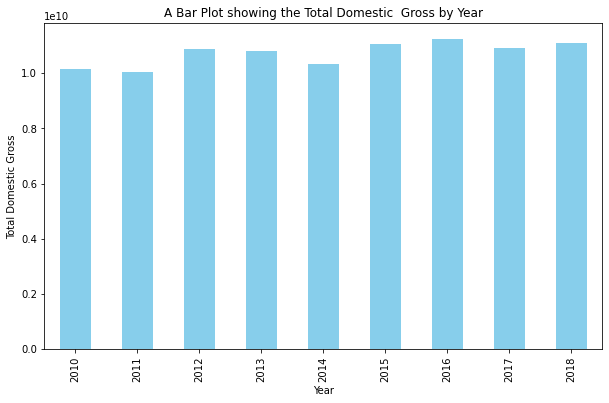

In [78]:
plt.figure(figsize=(10,6))
yearly_domestic_gross.plot(kind='bar', color='skyblue')
plt.title('A Bar Plot showing the Total Domestic  Gross by Year')
plt.xlabel('Year')
plt.ylabel('Total Domestic Gross')
plt.show()

#### From the above bar plot, we can see that the year in which the highest domestic gross income was generated was in 2016 where gross income from the movies was 11,253,653,097 dollars.